In [1]:
%matplotlib inline

import pathlib
import numpy as np
import matplotlib.pyplot as plt

import ncempy

# Quick view FEI / Thermo Fischer Velox EMD file
- Best for single scan STEM datasets with 1 or multiple detectors (HAADF, ADF, BF, ABF, etc.)
- Set the directory name and then the file name
- Show mutliple detector images in a 2xN set of columns
- Save the pyplot figure for easy display and insertion into documents


In [2]:
# Setup file path
file_path = pathlib.Path('../data/STEM HAADF-DF4-DF2-BF Diffraction Micro.emd')

EMD file contains 4 data sets
Dataset #0 from detector: HAADF
Dataset #1 from detector: DF2
Dataset #2 from detector: BF
Dataset #3 from detector: DF4
pixel size = (87.3708, 87.3708) nm


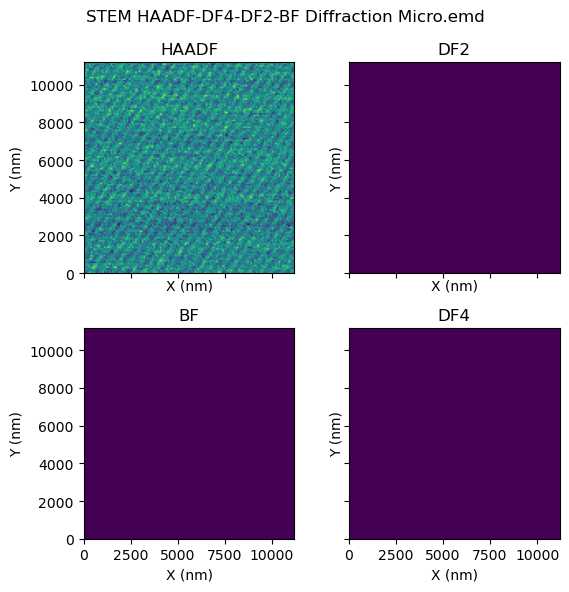

In [3]:
with ncempy.io.emdVelox.fileEMDVelox(file_path) as emd0:
    print(emd0) # print out information about the emd dataset
    if len(emd0.list_data) > 1:
        fg, ax = plt.subplots(nrows=len(emd0.list_data)//2,ncols=2,figsize=(6,6), sharex=True, sharey=True, squeeze=False)
    else:
        fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5), squeeze=False)
    
    for ii,axx in enumerate(ax.ravel()):
        dd, md = emd0.get_dataset(ii)
        fovX = md['pixelSize'][0]*dd.shape[0]
        fovY = md['pixelSize'][1]*dd.shape[1]
        axx.imshow(dd,extent=[0,fovX,0,fovY],origin='lower')
        axx.set(xlabel='X (nm)',ylabel='Y (nm)',title=md['detectorName'])
fg.suptitle(file_path.name)
fg.tight_layout()

# Save the figure with a high dpi (for display only)
- Note: The png file will look exactly like the figure above and is for convenience only.
- Use ncempy.io.emdVelox to get the raw data for analysis.

In [4]:
out_path = file_path.with_suffix('.png')
fg.savefig(out_path, dpi=300)
print(f'Figure saved as {out_path.resolve()}')

Figure saved as /home/jupyter-percius/scripting/openNCEM/ncempy/data/STEM HAADF-DF4-DF2-BF Diffraction Micro.png


# Print and write out the metadata as text
- In the EMD file, the metadata (experimental details like accelerating voltage, pixel size, apertures, extraction voltage, etc.) is stored in the format of a JSON file.

In [5]:
import pprint
pp = pprint.PrettyPrinter(indent=0)

# Print out the meta data for first data set
with ncempy.io.emdVelox.fileEMDVelox(file_path) as emd0:
    emd0.parseMetaData(emd0.list_data[0])
    pp.pprint(emd0.metaDataJSON)


{'Acquisition': {'AcquisitionDatetime': {'DateTime': '0'},
               'AcquisitionStartDatetime': {'DateTime': '1596041391'},
               'BeamType': '',
               'SourceType': 'XFEG'},
'BinaryResult': {'AcquisitionUnit': '',
                'CompositionType': '',
                'Detector': 'HAADF',
                'DetectorIndex': '4',
                'Encoding': '',
                'Offset': {'x': '-5.5917309531043732e-06',
                          'y': '-5.5917309531043732e-06'},
                'PixelSize': {'height': '8.7370796142255832e-08',
                             'width': '8.7370796142255832e-08'},
                'PixelUnitX': 'm',
                'PixelUnitY': 'm'},
'Core': {'MetadataDefinitionVersion': '7.9',
        'MetadataSchemaVersion': 'v1/2013/07',
        'guid': '00000000000000000000000000000000'},
'CustomProperties': {'Aperture[C1].Name': {'type': 'string', 'value': '2000'},
                    'Aperture[C2].Name': {'type': 'string', 'value': '1